In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

In [2]:
HP = pd.read_csv('Holiday_Package.csv')

In [3]:
HP = HP.drop(['Unnamed: 0'],axis=1)

In [4]:
# Making a copy of a original dataframe:
df = HP.copy()

In [5]:
df.rename(columns={'age' :'Age', 'educ': 'No_years_Education',
                   'no_young_children' :'No_Young_kids','no_older_children' :'No_Elder_kids',
                   'Holliday_Package':'Holiday_package','foreign' : 'Foreigner'},inplace=True)

In [6]:
df1 = df.copy()

In [7]:
df1['No_years_Education'] = np.where(df1['No_years_Education'] <=5,5,df1['No_years_Education'])
df1['No_years_Education'] = np.where(df1['No_years_Education'] >=17,17,df1['No_years_Education'])
df1['No_Elder_kids'] = np.where(df1['No_Elder_kids'] >=4,4,df1['No_Elder_kids'])

In [8]:
df1['Holiday_package'] = np.where(df1['Holiday_package'] == 'yes',1,df1['Holiday_package'])
df1['Holiday_package'] = np.where(df1['Holiday_package'] == 'no',0,df1['Holiday_package'])

In [9]:
df1['Foreigner'] = np.where(df1['Foreigner'] == 'yes',1,df1['Foreigner'])
df1['Foreigner'] = np.where(df1['Foreigner'] == 'no',0,df1['Foreigner'])

In [21]:
df1[df1['Salary'] > df1['Salary'].quantile(.90)].count()[0]

88

In [94]:
# df2 = df1.copy()
# df2 = df2.drop(['Salary'],axis=1)
# df2['Salary'] = df['Salary']
lr,ur=Outlier_ur_lr(df1['Salary'])
df2['Salary'] = np.where(df2['Salary'] < lr,lr,df2['Salary'])

In [73]:
# df1 = df1.drop(['Salary'],axis=1)
df1['Salary'] = df['Salary']

In [71]:
# Function to calculate lower_range and upper_range
def Outlier_ur_lr(column):
    sorted(column)
    Q1,Q3=np.percentile(column,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [74]:
lr,ur=Outlier_ur_lr(df1['Salary'])
df1['Salary'] = np.where(df1['Salary'] < lr,lr,df1['Salary'])
df1['Salary'] = np.where(df1['Salary'] > ur,ur,df1['Salary'])

In [75]:
df1['Holiday_package'] = df1['Holiday_package'].astype('int64')
df1['Foreigner'] = df1['Foreigner'].astype('int64')

In [124]:
# Copy all the predictor variables into X dataframe
X = df1.iloc[:,1:]
# Copy target into the y dataframe. 
y = df1['Holiday_package']

In [125]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30 , random_state=123,stratify = y)

In [126]:
Params = {'penalty':['l2','none'],
      'solver':['newton-cg','liblinear'],
         'tol':[0.0001]}

In [127]:
model = LogisticRegression()

In [128]:
Grid_search = GridSearchCV(estimator = model, param_grid = Params, cv = 3,scoring='f1')

In [129]:
Grid_search.fit(Xtrain, ytrain)

C:\Users\91861\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91861\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91861\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91861\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91861\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\91861\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91861\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91861\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91861\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91861\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\91861\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91861\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91861\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\91861\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\91861\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\91861\anacond

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'liblinear'],
                         'tol': [0.0001]},
             scoring='f1')

In [130]:
LR_Model = Grid_search.best_estimator_

In [131]:
# Prediction on the training set

Predict_ytrainM1 = LR_Model.predict(Xtrain)
Predict_ytestM1 = LR_Model.predict(Xtest)

## Getting the probabilities on the test set

PredictProba_ytrainM1=LR_Model.predict_proba(Xtrain)
PredictProba_ytestM1=LR_Model.predict_proba(Xtest)


#### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

 Logit :Classification Report : Train Data 

              precision    recall  f1-score   support

           0       0.64      0.74      0.69       329
           1       0.63      0.52      0.57       281

    accuracy                           0.64       610
   macro avg       0.64      0.63      0.63       610
weighted avg       0.64      0.64      0.63       610

 Logit :Classification Report : Test Data 

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       142
           1       0.77      0.52      0.62       120

    accuracy                           0.71       262
   macro avg       0.72      0.69      0.69       262
weighted avg       0.72      0.71      0.70       262



 Logit :Confusion Matrix 


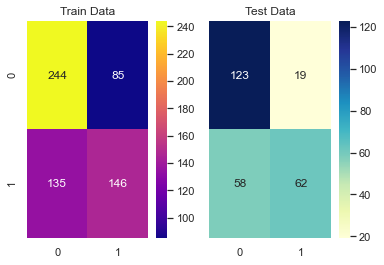

In [134]:
#Build LDA Model and fit the data
clf = LinearDiscriminantAnalysis(solver='eigen',tol=0.0001)
LDA_Model =clf.fit(Xtrain,ytrain)

In [135]:
# Prediction on the training set

Predict_ytrainM2 = LDA_Model.predict(Xtrain)
Predict_ytestM2 = LDA_Model.predict(Xtest)

## Getting the probabilities on the test set

PredictProba_ytrainM2=LDA_Model.predict_proba(Xtrain)
PredictProba_ytestM2=LDA_Model.predict_proba(Xtest)

In [ ]:
print('\033[1m','Logit :Classification Report : Train Data','\033[0m')
print("")
print(classification_report(ytrain,Predict_ytrainM1))
print('\033[1m','Logit :Classification Report : Test Data','\033[0m')
print("")
print(classification_report(ytest,Predict_ytestM1))

In [ ]:
# Evaluation
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(ytrain,Predict_ytrainM1)),annot=True,fmt='.5g',cmap='plasma',ax=a[0][0]);
a[0][0].set_title('Train Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(ytest,Predict_ytestM1)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data');
print('\033[1m','Logit :Confusion Matrix','\033[0m')

In [136]:
print('\033[1m','LDA :Classification Report : Train Data','\033[0m')
print("")
print(classification_report(ytrain,Predict_ytrainM2))
print('\033[1m','LDA :Classification Report : Test Data','\033[0m')
print("")
print(classification_report(ytest,Predict_ytestM2))

 LDA :Classification Report : Train Data 

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       329
           1       0.64      0.51      0.57       281

    accuracy                           0.64       610
   macro avg       0.64      0.63      0.63       610
weighted avg       0.64      0.64      0.64       610

 LDA :Classification Report : Test Data 

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       142
           1       0.77      0.53      0.62       120

    accuracy                           0.71       262
   macro avg       0.73      0.70      0.69       262
weighted avg       0.72      0.71      0.70       262



 LDA :Confusion Matrix 


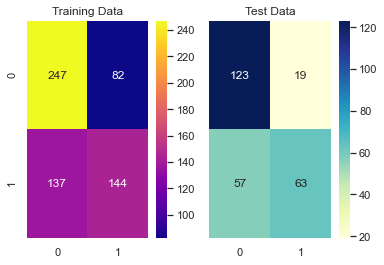

In [137]:
# Evaluation
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(ytrain,Predict_ytrainM2)),annot=True,fmt='.5g',cmap='plasma',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(ytest,Predict_ytestM2)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data');
print('\033[1m','LDA :Confusion Matrix','\033[0m')